# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the Dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/PRIYANG-BHATT/Datasets/main/DS/heart.csv")

# Getting Insights of Dataset

In [3]:
print(df.head())
print(df.shape)
print(df.info())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
(1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null 

# Data Filtering

Checking Missing Values

In [4]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Checking Duplicate Values

In [5]:
df_dup=df.duplicated().any()
print(df_dup)

True


In [6]:
#Removing Duplicates in the Data
df=df.drop_duplicates()

In [7]:
df_dup=df.duplicated().any()
print(df_dup)

False


# Data Preprocessing

In [25]:
cate_val=[]
nume_val=[]
for column in df.columns:
    if df[column].nunique() <=10:
        cate_val.append(column)
    else:
        nume_val.append(column)

In [26]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [27]:
nume_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [28]:
cate_val.remove('sex')
cate_val.remove('target')

In [29]:
df=pd.get_dummies(df,columns=cate_val,drop_first=True)

In [30]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# Feature Scaling

In [31]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [32]:
#Feature Scaling for Distance based algorithms
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
df[nume_val]=st.fit_transform(df[nume_val])
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# Splitting the Dataset into Train & Test Set

In [33]:
X=df.drop('target',axis=1)
y=df['target']

In [34]:
X

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [35]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Implementing Different Classification Algorithms

1. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [38]:
y_pred1=log.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred1) *100)

78.68852459016394


2. Support Vector Classifier(SVC)

In [44]:
from sklearn import svm
svm=svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [45]:
y_pred2=svm.predict(X_test)

In [46]:
print(accuracy_score(y_test,y_pred2) *100)

80.32786885245902


3. KNeighbors Classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
y_pred3=knn.predict(X_test)

In [49]:
print(accuracy_score(y_test,y_pred3) *100)

73.77049180327869


In [53]:
score=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [55]:
print("The Maximum accuracy available in k-nearest neighbors is :" ,max(score)*100)

The Maximum accuracy available in k-nearest neighbors is : 80.32786885245902


4. Non-Linear ML Algorithms

In [58]:
df=pd.read_csv("https://raw.githubusercontent.com/PRIYANG-BHATT/Datasets/main/DS/heart.csv")
print(df.head())
print(df.shape)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
(1025, 14)


In [59]:
df=df.drop_duplicates()
print(df.shape)

(302, 14)


In [60]:
#Seggregating Dataset into Independent & Dependent Variable
X=df.drop('target',axis=1)
y=df['target']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# a. Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
y_pred4=dt.predict(X_test)

In [63]:
print(accuracy_score(y_test,y_pred4) *100)

70.49180327868852


# b. Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
y_pred5=rf.predict(X_test)

In [66]:
print(accuracy_score(y_test,y_pred5) *100)

85.24590163934425


# c. Gradient Boosting Classifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [68]:
y_pred6=gbc.predict(X_test)

In [69]:
print(accuracy_score(y_test,y_pred6) *100)

80.32786885245902


# Choosing Best Classifier 

In [70]:
final_df = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],'Accuracy':[accuracy_score(y_test,y_pred1),
                                                                               accuracy_score(y_test,y_pred2),
                                                                               accuracy_score(y_test,y_pred3),
                                                                               accuracy_score(y_test,y_pred4),
                                                                               accuracy_score(y_test,y_pred5),
                                                                               accuracy_score(y_test,y_pred6)]})
print(final_df)

  Models  Accuracy
0     LR  0.786885
1    SVM  0.803279
2    KNN  0.737705
3     DT  0.704918
4     RF  0.852459
5     GB  0.803279


C:\Users\satwi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

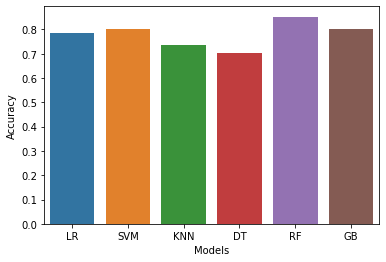

In [71]:
#Visulaizing the Comparison between Different Classifiers & Choosing the Best one
sns.barplot(final_df['Models'],final_df['Accuracy'])

# Training Random Forest Classifier on Entire Dataset

In [72]:
X=df.drop('target',axis=1)
y=df['target']
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

# Prediction on New Data using RFC

In [74]:
new_data=pd.DataFrame({
    'age': 52,
    'sex ': 1,
    'cp': 0,
    'trestbps': 125,
    'chol': 212,
    'fbs': 0,
    'restecg':1,
    'thalach':168,
    'exang': 0,
    'oldpeak': 1.0,
    'slope': 2,
    'ca': 2,
    'thal':3,
},index=[0])
print(new_data)

   age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   52     1   0       125   212    0        1      168      0      1.0   

   slope  ca  thal  
0      2   2     3  


In [75]:
p=rf.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


C:\Users\satwi\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- sex 
Feature names seen at fit time, yet now missing:
- sex

  warnings.warn(message, FutureWarning)


# Saving Model using Joblib

In [76]:
import joblib
#Saving Our Model
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [77]:
#Load the Saved Model
model = joblib.load('model_joblib_heart')

# GUI

In [78]:
from tkinter import *
import joblib
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\satwi\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\satwi\AppData\Local\Temp\ipykernel_21084\2784296151.py", line 6, in show_entry_fields
    p3=int(e3.get())
ValueError: invalid literal for int() with base 10: ''
